# Who's a good doggo?

In this project we're aiming to gather, assess, clean, store, analyze and visualize some Twitter data on pupper ratings with fluffy images.


## Table of Contents

- [Gathering](#gathering)

- [Assessing](#assessing)

- [Cleaning](#cleaning)

    * [Quality Fix 1](#qf1)
    * [Quality Fix 2](#qf2)
    * [Quality Fix 3](#qf3)
    * [Quality Fix 4](#qf4)
    * [Quality Fix 5](#qf5)
    * [Quality Fix 6](#qf6)
    * [Tidiness Fix 1](#tf1)
    * [Tidiness Fix 2](#tf2)
    * [Quality Fix 7](#qf7)
    * [Quality Fix 8](#qf8)
    * [Tidiness Fix 3](#tf3)
    * [Quality Fix 9](#qf9)
    * [Quality Fix 10](#qf10)
    
- [Storing](#storing)

- [Analysis & Visualization](#analysisandviz)

    * [Insight 1](#in1)
    * [Insight 2](#in2)
    * [Insight 3](#in3)
    * [Insight 4](#in4)
    * [Insight 5](#in5)    

Let's start with importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

<a id='gathering'></a>
## Gathering

`1.` We've got thre WeRateDogs Twitter archive, I'll read this as a flat file.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


`2.` The tweet image predictions is present in each tweet according to a neural network, I'll download this programmatically from Udacity servers then read it.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open ("image_predictions.tsv", mode = 'wb') as outfile:
    outfile.write(response.content)

In [6]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')

In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`3.` Other data related to the tweets such as retweet count and favorite counts are available through Twitter API - I've manually downloaded the data and now will read it as a JSON file.

In [8]:
tweet_data = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count'])
with open ('tweet-json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id']
        rewteet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_data = tweet_data.append(pd.DataFrame([[tweet_id, rewteet_count, favorite_count]], columns = ['tweet_id', 'retweet_count', 'favorite_count']))
        
tweet_data = tweet_data.reset_index(drop = True)
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Here's how it can be downloaded:

<a id='assessing'></a>
## Assessing

In this section I'll go through the data & record my findings to fix later on.

In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304...,12,10,Ava,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None,None,None,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,None,None,None
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive[twitter_archive.name == 'None'].tweet_id.count()

745

In [14]:
twitter_archive.groupby('name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
such,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
the,8,0,0,8,8,8,0,0,0,8,8,8,8,8,8,8
this,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


In [15]:
twitter_archive.tweet_id.duplicated().sum()

0

In [16]:
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [17]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,0.000030,False,agama,0.000022,False


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_predictions.tweet_id.duplicated().sum()

0

In [22]:
image_predictions[image_predictions['p1_dog'] == True].count()[0]

1532

In [23]:
image_predictions[image_predictions['p2_dog'] == True].count()[0]

1553

In [24]:
image_predictions[image_predictions['p3_dog'] == True].count()[0]

1499

In [25]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
1180,718971898235854848,1231,3818
332,832757312314028032,4127,18423
1954,673612854080196609,802,1691
2091,670780561024270336,317,831
962,750506206503038976,1316,4934


In [26]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [27]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


In [28]:
tweet_data.tweet_id.duplicated().sum()

0

In [29]:
tweet_data.retweet_count.isnull().sum()

0

In [30]:
tweet_data[tweet_data['favorite_count'].isnull()]

,tweet_id,retweet_count,favorite_count


### Quality

- Number of rows don't match in tables.

#### `twitter_archive` table

- Data type issues:
    - tweet_id is int64, should be string (object)
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are floats, should be strings (I'll drop these anyway)
    - timestamp and retweeted_status_timestamp are strings, should be dates
- Max value for rating_numerator is 1776, but I assume this is OK due to the fun side of things.
- There are values less than 10 for rating_denominator, which are incorrect by definition.
- There are 745 dogs with name 'None', which I think is a pretty bad choice of a name; names either weren't mentioned in the tweet or somehow didn't make it to this data set. I'll replace these with NaN so that they don't distort our visuals.
- Also found other words that can't be dog names (such, very, an, etc.). These all look like lowercase words we need to get rid of.
- Unnecessary columns can be dropped (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_id, expanded_urls)

#### `image_predictions` table

- Data type issues:
    - tweet_id is int64, should be string (to match the other tables)

#### `tweet_data` table

- Data type issues:
    - retweet_count and favorite_count are strings, should be numbers

### Tidiness

- All 3 tables can be merged into 1.

#### `twitter_archive` table

- Dog stages have their respective columns which can be reduced to one.
- rating_numerator and rating_denominator can be used to calculate a rating score then stored in 1 column.

#### `image_predictions` table

- p1, p2 and p3 can be merged into 1 dog_breed column using respective confidence intervals only for the rows that px_dog = True, but I won't perform this here.

#### `tweet_data` table

This table was already extracted in a tidy format.

<a id='cleaning'></a>
## Cleaning

I'll start by making copies of individual tables, then clean & merge them.

#### `twitter_archive` table

In [31]:
twitter_archive_v2 = twitter_archive.copy()

<a id='qf1'></a>
#### Define - Quality Fix 1

Delete redundant columns.

#### Code

In [32]:
twitter_archive_v2.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id', 'expanded_urls'], axis = 1, inplace = True)

#### Check

In [33]:
twitter_archive_v2.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


<a id='qf2'></a>
#### Define - Quality Fix 2

Convert timestamp column to datetime format.

#### Code

In [34]:
twitter_archive_v2['timestamp'] = pd.to_datetime(twitter_archive_v2['timestamp'])

#### Check

In [35]:
twitter_archive_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


<a id='qf3'></a>
#### Define - Quality Fix 3

Convert tweet_id to string.

#### Code

In [36]:
twitter_archive_v2['tweet_id'] = twitter_archive_v2['tweet_id'].astype('object')

#### Check

In [37]:
twitter_archive_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 202.6+ KB


<a id='qf4'></a>
#### Define - Quality Fix 4

Replace values for rating_denominator less than 10 with 10.

#### Code

In [38]:
twitter_archive_v2.loc[twitter_archive_v2.rating_denominator < 10, 'rating_denominator'] = 10

#### Check

In [39]:
twitter_archive_v2.rating_denominator.sort_values()

0        10
1563     10
1564     10
1565     10
1566     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

<a id='qf5'></a>
#### Define - Quality Fix 5

Get rid of lower case words in dog names column.

#### Code

In [40]:
lowercase_names = twitter_archive_v2[twitter_archive_v2['name'].str.islower()]
lowercase_names.name

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [41]:
lowercase_names_index = twitter_archive_v2[twitter_archive_v2.name.str.islower()].index

In [42]:
twitter_archive_v2.drop(lowercase_names_index, inplace = True)

#### Check

In [43]:
twitter_archive_v2.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [44]:
twitter_archive_v2.shape

(2247, 11)

In [45]:
twitter_archive_v2.name.value_counts()

None         745
Charlie       12
Oliver        11
Cooper        11
Lucy          11
            ... 
Jarod          1
Naphaniel      1
Strudel        1
Kulet          1
Strider        1
Name: name, Length: 932, dtype: int64

<a id='qf6'></a>
#### Define - Quality Fix 6

Replace word 'None' in dog names column with NaN.

#### Code

In [46]:
twitter_archive_v2.name.replace('None', np.nan, inplace = True)

#### Check

In [47]:
twitter_archive_v2.name.value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
             ..
Barry         1
Jarod         1
Naphaniel     1
Strudel       1
Strider       1
Name: name, Length: 931, dtype: int64

In [48]:
twitter_archive_v2.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [49]:
twitter_archive_v2.shape

(2247, 11)

<a id='tf1'></a>
#### Define - Tidiness Fix 1

Merge all dog stages into 1 column & drop the rest.

#### Code

In [50]:
twitter_archive_v2.doggo.replace('None', '', inplace = True)
twitter_archive_v2.floofer.replace('None', '', inplace = True)
twitter_archive_v2.pupper.replace('None', '', inplace = True)
twitter_archive_v2.puppo.replace('None', '', inplace = True)

In [51]:
twitter_archive_v2['dog_stage'] = twitter_archive_v2.doggo + twitter_archive_v2.floofer + twitter_archive_v2.pupper + twitter_archive_v2.puppo

In [52]:
twitter_archive_v2.loc[twitter_archive_v2.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_archive_v2.loc[twitter_archive_v2.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
twitter_archive_v2.loc[twitter_archive_v2.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'

In [53]:
twitter_archive_v2.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Check

In [54]:
twitter_archive_v2.dog_stage.value_counts()

            1883
pupper       233
doggo         81
puppo         29
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [55]:
twitter_archive_v2.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,


<a id='tf2'></a>
#### Define - Tidiness Fix 2

Calculate rating using rating_numerator and rating_denominator, then drop them.

#### Code

In [56]:
twitter_archive_v2['rating'] = twitter_archive_v2.rating_numerator / twitter_archive_v2.rating_denominator

In [57]:
twitter_archive_v2.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

#### Check

In [58]:
twitter_archive_v2.head()

,tweet_id,timestamp,source,text,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,,1.2


In [59]:
twitter_archive_v2.describe()

,rating
count,2247.000000
mean,1.274969
std,4.633156
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,177.600000


#### `image_predictions` table

In [60]:
image_predictions_v2 = image_predictions.copy()

<a id='qf7'></a>
#### Define - Quality Fix 7

Convert tweet_id to string.

#### Code

In [61]:
image_predictions_v2['tweet_id'] = image_predictions_v2['tweet_id'].astype('object')

#### Check

In [62]:
image_predictions_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [63]:
image_predictions_v2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### `tweet_data` table

In [64]:
tweet_data_v2 = tweet_data.copy()

<a id='qf8'></a>
#### Define - Quality Fix 8

Convert retweet_count and favorite_count to integers.

#### Code

In [65]:
tweet_data_v2.retweet_count = tweet_data_v2.retweet_count.astype(int)

In [66]:
tweet_data_v2.favorite_count = tweet_data_v2.favorite_count.astype(int)

#### Check

In [67]:
tweet_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int32 
 2   favorite_count  2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


In [68]:
tweet_data_v2.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


<a id='tf3'></a>
#### Define - Tidiness Fix 3

Merge all 3 tables.

#### Code

In [69]:
df_temp = pd.merge(twitter_archive_v2, tweet_data_v2, how = 'left', on = ['tweet_id'] )

In [70]:
twitter_archive_master = pd.merge(df_temp, image_predictions_v2, how = 'left', on = ['tweet_id'] )

#### Check

In [71]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,name,dog_stage,rating,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,,1.3,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,,1.3,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,,1.2,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,,1.3,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,,1.2,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [72]:
twitter_archive_master.describe()

,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2247.000000,2245.000000,2245.000000,1975.000000,1975.000000,1.975000e+03,1.975000e+03
mean,1.274969,3189.896659,8190.387528,1.208101,0.595365,1.340071e-01,6.019098e-02
std,4.633156,5314.522057,11853.001946,0.565592,0.272360,1.005376e-01,5.100520e-02
min,0.000000,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,646.000000,1501.000000,1.000000,0.363091,5.370120e-02,1.594050e-02
50%,1.100000,1501.000000,3684.000000,1.000000,0.589066,1.173970e-01,4.899880e-02
75%,1.200000,3710.000000,10342.000000,1.000000,0.848882,1.948045e-01,9.233995e-02
max,177.600000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [73]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'dog_stage',
       'rating', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2247 non-null   object             
 1   timestamp       2247 non-null   datetime64[ns, UTC]
 2   source          2247 non-null   object             
 3   text            2247 non-null   object             
 4   name            1502 non-null   object             
 5   dog_stage       2247 non-null   object             
 6   rating          2247 non-null   float64            
 7   retweet_count   2245 non-null   float64            
 8   favorite_count  2245 non-null   float64            
 9   jpg_url         1975 non-null   object             
 10  img_num         1975 non-null   float64            
 11  p1              1975 non-null   object             
 12  p1_conf         1975 non-null   float64            
 13  p1_dog          1975 non-null   o

There are some quality issues here as well - Let's fix them before exporting it.

<a id='qf9'></a>
#### Define - Quality Fix 9

img_num should be an integer. But we must convert empty values to zeros before doing it.

#### Code

In [75]:
twitter_archive_master['img_num'] = twitter_archive_master['img_num'].fillna(0)

In [76]:
twitter_archive_master['img_num'] = twitter_archive_master['img_num'].astype(int)

#### Check

In [77]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2247 non-null   object             
 1   timestamp       2247 non-null   datetime64[ns, UTC]
 2   source          2247 non-null   object             
 3   text            2247 non-null   object             
 4   name            1502 non-null   object             
 5   dog_stage       2247 non-null   object             
 6   rating          2247 non-null   float64            
 7   retweet_count   2245 non-null   float64            
 8   favorite_count  2245 non-null   float64            
 9   jpg_url         1975 non-null   object             
 10  img_num         2247 non-null   int32              
 11  p1              1975 non-null   object             
 12  p1_conf         1975 non-null   float64            
 13  p1_dog          1975 non-null   o

<a id='qf10'></a>
#### Define - Quality Fix 10

Convert px_dog predictions to boolean.

#### Code

In [78]:
twitter_archive_master['p1_dog'] = twitter_archive_master['p1_dog'].astype(bool)
twitter_archive_master['p2_dog'] = twitter_archive_master['p2_dog'].astype(bool)
twitter_archive_master['p3_dog'] = twitter_archive_master['p3_dog'].astype(bool)

#### Check

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2247 non-null   object             
 1   timestamp       2247 non-null   datetime64[ns, UTC]
 2   source          2247 non-null   object             
 3   text            2247 non-null   object             
 4   name            1502 non-null   object             
 5   dog_stage       2247 non-null   object             
 6   rating          2247 non-null   float64            
 7   retweet_count   2245 non-null   float64            
 8   favorite_count  2245 non-null   float64            
 9   jpg_url         1975 non-null   object             
 10  img_num         2247 non-null   int32              
 11  p1              1975 non-null   object             
 12  p1_conf         1975 non-null   float64            
 13  p1_dog          2247 non-null   b

<a id='storing'></a>
## Storing

In [80]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<a id='analysisandviz'></a>
## Analysis & Visualization

Let's now take a look at some observations about what this data may be telling us.

In [81]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='in1'></a>
#### Insight 1: Which tweet was favorited the most?

In [82]:
favorite_count_max = twitter_archive_master['favorite_count'].max()
favorite_count_max

132810.0

In [83]:
twitter_archive_master[twitter_archive_master.favorite_count == 132810].tweet_id

406    822872901745569793
Name: tweet_id, dtype: object

In [84]:
favorite_tweet = twitter_archive_master[twitter_archive_master.tweet_id == 822872901745569793].text
print((" ").join(favorite_tweet))

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


In [85]:
twitter_archive_master[twitter_archive_master.tweet_id == 822872901745569793].jpg_url

406    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [86]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', width=250, height=250)

We see a puppo participating in the Women's March 4 her moms - definetely favorite worthy. 20/10 would march with.

<a id='in2'></a>
#### Insight 2: Which tweet was retweeted the most?

In [87]:
retweet_count_max = twitter_archive_master['retweet_count'].max()
retweet_count_max

79515.0

In [88]:
twitter_archive_master[twitter_archive_master.retweet_count == 79515].tweet_id

1014    744234799360020481
Name: tweet_id, dtype: object

In [89]:
popular_tweet = twitter_archive_master[twitter_archive_master.tweet_id == 744234799360020481].text
print((" ").join(popular_tweet))

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


A doggo gets enlightened about physics laws in a pool - 10/10 would chill with.

<a id='in3'></a>
#### Insight 3: What are the most common dog names in this data frame?

In [90]:
dog_names = twitter_archive_master['name'].value_counts()
dog_names

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
             ..
Barry         1
Jarod         1
Naphaniel     1
Strudel       1
Strider       1
Name: name, Length: 931, dtype: int64

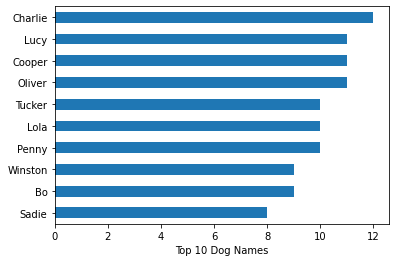

In [91]:
plt.xlabel('Top 10 Dog Names')
ax = dog_names.iloc[:10].plot(kind="barh")
ax.invert_yaxis();

Here we see the top 10 names of most tweeted dogs in this data set - Charlies seem to be pretty popular.

<a id='in4'></a>
#### Insight 4: What are the most common dog breeds in this data frame?

Neural network data gives us some possible dog breeds with a level of confidence - let's see which ones we've got according to p1_conf.

In [92]:
dog_breeds = twitter_archive_master[twitter_archive_master['p1_dog'] == True].p1.value_counts()
dog_breeds

golden_retriever           145
Labrador_retriever          97
Pembroke                    85
Chihuahua                   81
pug                         54
                          ... 
Scotch_terrier               1
groenendael                  1
black-and-tan_coonhound      1
clumber                      1
standard_schnauzer           1
Name: p1, Length: 111, dtype: int64

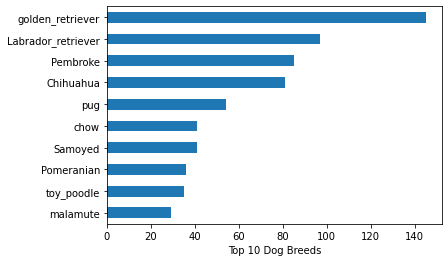

In [93]:
plt.xlabel('Top 10 Dog Breeds')
ax = dog_breeds.iloc[:10].plot(kind = 'barh')
ax.invert_yaxis();

Here are the top 10 dog breed predictions in our data set with p1 confidence level - retrievers are the most common in our tweet images.

<a id='in5'></a>
#### Insight 5: Which image has our most confident breed prediction?

In [94]:
dog_breed_max = twitter_archive_master[twitter_archive_master['p1_dog'] == True].p1_conf.max()
dog_breed_max

0.999953

In [95]:
twitter_archive_master[twitter_archive_master.p1_conf == 0.999953].tweet_id

848    762464539388485633
Name: tweet_id, dtype: object

In [96]:
max_conf_breed = twitter_archive_master[twitter_archive_master.tweet_id == 762464539388485633].p1
print(("").join(max_conf_breed))

chow


In [97]:
max_conf_breed_tweet = twitter_archive_master[twitter_archive_master.tweet_id == 762464539388485633].text
print(("").join(max_conf_breed_tweet))

This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.co/zGSj1oUgxx


In [98]:
twitter_archive_master[twitter_archive_master.tweet_id == 762464539388485633].jpg_url

848    https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg
Name: jpg_url, dtype: object

In [99]:
Image(url = 'https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg', width = 250, height = 250)

In [100]:
twitter_archive_master[twitter_archive_master.tweet_id == 762464539388485633].name

848    Buddy
Name: name, dtype: object

We're almost 100% sure Buddy is a cute Chow - 100/10 would snug.

I'll save this document as the master report.

Thank you for reading my findings!

In [101]:
os.system('jupyter nbconvert --to html wrangle_act.ipynb')

0